# Artificial Intelligence
## L2 International, Univ. Bordeaux

### Supervised Learning : Artificial Neural Networks

Recall that an artificial neural network (ANN for short) consists of a set of layers disposed linearly, and each layer is a set of (artificial) neurons. The model is simplified so that signals can only circulate from the bottom layer to the top layer. Each neuron in the $k$-th layer of the neural network is connected to all the neurons in the $(k − 1)$-th layer, and the neurons in a given layer are all independent from each other.

A neural network consists of the following components

   - An input layer, $x$
    
   - An arbitrary amount of hidden layers
    
   - An output layer, $y$
    
   - A set of weights and biases between each layer, $w$ and $b$

   - A choice of activation function for each hidden layer, $\sigma$.

#### Project Description

This will be the Part 2 of your project for the evaluation of this course. Make sure to add the code and analysis for each of the tasks given. Take care to write clean and commented code and to add titles, labels will displaying figures.
In this work we will use the MNIST (Modified National Institute of Standards and Technology database) dataset. You do not need to download it as it is available with the `keras` library using `tensorflow`.

The main goals of the project will be to train a basic ANN for the classification of the data. There are some parameters that need to be specified during the learning called *Hyper Parameters* which you will have to try out a few values of and do the analyis of how it affects the final performance of the model. Analysis of the architecture of the ANN, the hyper parameters used and the final evaluation will be the primary goals for this project.

1. Similar to the previous labs the first task is to import the necessary libraries like: `matplotlib`, `numpy`, `tensorflow`

Hint: It is common practice to load the `tensorflow` library with the alias `tf` (similar to `pd` or `np` for pandas or numpy)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2. a. Load the `mnist` dataset from `tf.keras.datasets` . Check the use of the `load_data()` function to load the `train` and `test` samples (`X`) along with thier labels (`Y`) [CODE]
b. Check the shapes of the train samples and labels and comment of what the dimensions represent. [ANALYSIS]
c. Visualize a single image from the train set. Use the correspongding label as the title for the image that you display

BONUS: Try to get one image per digit (0-9) and display it as an image grid (You can use `matplotlib` or `opencv`)  [OPTIONAL]

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


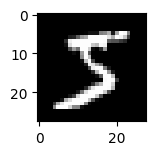

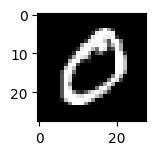

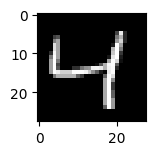

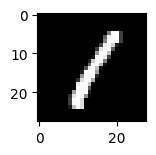

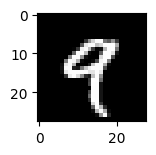

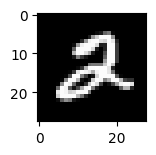

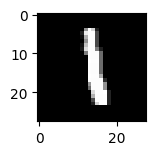

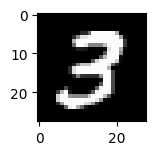

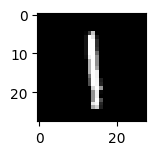

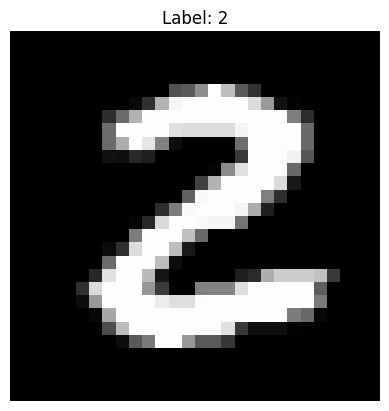

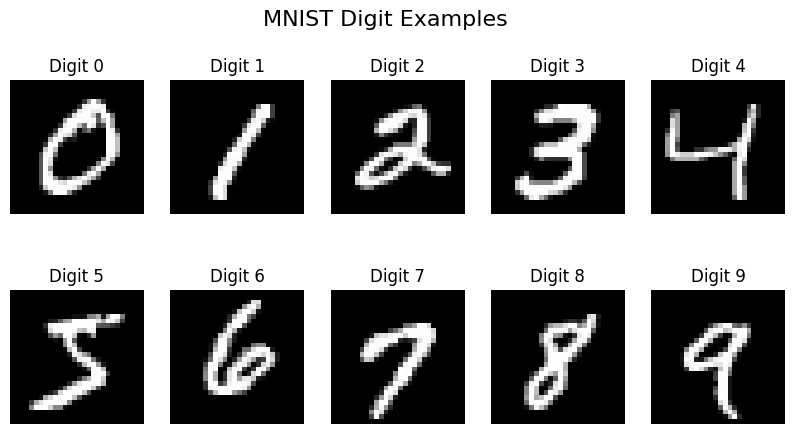

In [ ]:

#a)
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Check the shapes of the train samples and labels
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.show()
#b) display one image

image_index = 25

# Display the image
plt.imshow(train_images[image_index], cmap='gray')
plt.title(f"Label: {train_labels[image_index]}")
plt.axis('off')  # Hide axes
plt.show()

#c)
# Display the image
# Create a dictionary to store one image per digit
digit_images = {i: None for i in range(10)}

# Find the first occurrence of each digit
for i in range(len(train_labels)):
    label = train_labels[i]
    if digit_images[label] is None:
        digit_images[label] = train_images[i]

# Create a 2x5 grid to display the images
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("MNIST Digit Examples", fontsize=16)

for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.imshow(digit_images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()



ANALYSIS

The train_images array has a shape of (60000, 28, 28). The 60000 represents the number of training samples, 28 the number of rows of each image and 28 the number of columns.

The train_labels array has a shape of (60000,).
Each label corresponds to a specific digit (0 to 9) for the corresponding image in the train_images array.

3. **DATA PREPROCESSING**: As we are going to be using a simple ANN we cannot use the images as is (they are in their 2D representation). Thus, you will have to `reshape` them into a single vector. [Hint remember the what you did with KNN when you found the total number of pixels and reshaped]

Reshape both the train and the test dataset
Also, remember that we have to do normalization of the pixels values

In [ ]:
# Reshape train and test images and labels
train_images_flat = train_images.reshape(train_images.shape[0], 28 * 28).astype("float32")
test_images_flat = test_images.reshape(test_images.shape[0], 28 * 28).astype("float32")
train_labels = train_labels.reshape(train_labels.shape[0], 1).astype("float32")
test_labels = test_labels.reshape(test_labels.shape[0], 1).astype("float32")

# Check the new shapes
print(f"Train images (flattened) shape: {train_images_flat.shape}")
print(f"Test images (flattened) shape: {test_images_flat.shape}")

# Normalize pixel values
train_images_normalized = train_images_flat / 255
test_images_normalized = test_images_flat / 255





Train images (flattened) shape: (60000, 784)
Test images (flattened) shape: (10000, 784)


**Label Encoding** : We also use "one-hot" encoding to encode the classes from a single number to a representation of 10 digits such that there is a one at the position where the label is present.

In [ ]:

# Here the command is given for the train data. Do the same for the test array too
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=None, dtype='float32')
test_labels= tf.keras.utils.to_categorical(test_labels, num_classes=None, dtype='float32')



4. **Building the Model**:


Building the network requires configuring the layers of the model, then compiling the model.

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


**Set up the layers**

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them.

The network we build is going to be the chaining together of these simple layers. For example, `tf.keras.layers.Dense` is often quite useful and will have parameters that will be learnt during training (e.g. weights, biases etc.)

You can use the given code to create your model. Be careful to give it the correct value for the `num_pixels` when calling the function


In [ ]:
#CODE
num_classes = 10       #Use the train label array to find how many unique labels are present
num_pixels = 748     # Use the height and width of the images to find out how many pixels are there in the image

def neural_network(num_pixels):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'),
        tf.keras.layers.Dense(num_classes, kernel_initializer='normal', activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Use the function to instantiate the model. What do you see at the output? How many parameters are present in your network?

In [ ]:
# CODE
model=neural_network(784)            # Create a model with the function
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


ANALYSIS

5. **Train the model**

Training the neural network model requires the following steps:

1. Feed the training data to the model.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set - e.g. a single sample from your test set
4. Verify that the predictions match the labels from the corresponding sample of the labels from test set array.

In [ ]:
#CODE
# Hint: Train the model with the .fit function and give the correct inputs (samples and labels), specify the epochs and set the batch_size_

# Train the model
history = model.fit(train_images_normalized, train_labels, epochs=10, batch_size=32)



# Make predictions
model_predictions = model.predict(test_images_normalized)


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.1893 - accuracy: 0.9429
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0479 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0162 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


6. **Evaluate the Model**

a. Call the `.evaluate()` on your trained model and the score with the test data (samples, labels) and print the scores as accuracy percentage. [CODE]

b. Comment on the accuracy get after the training and with the test set. Is it different? [ANALYSIS]

c. What do you think could be the reason for this difference?  [ANALYSIS]

d. Can you explain in your own words what is *Overfitting* and on how you could quickly identify it by looking at the accuracy on the training and test set?  [ANALYSIS]


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_normalized, test_labels)
print("Accuracy on test set: {:.2f}%".format(test_accuracy * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9818
Accuracy on test set: 98.18%


ANALYSIS

b. The accuracy on the test set is slightly lower than the accuracy on the training set. On the majority of tests for the training set, we have the accuracy of over 99%, but for the test set is 98.18% .

c. During training, the model learns to fit the training data, which might include patterns that are not generalizable to unseen data. The test set acts as a measure of how well the model can generalize to new, unseen data.

d. Overfitting occurs when a model learns the training data too well, including noise and irrelevant patterns.If the model's accuracy on the training set is significantly higher than its accuracy on the test set, it suggests overfitting. This indicates that the model has memorized the training data rather than learning the underlying patterns. We can also notice in the train set how the percentage of the accuracy increases rapidly, which indicates that the model learned the patterns of the training data set.

7. **Hyper-parameter Tuning**

a. Try to train the model with different values of the hyperparameters: try using a different values for `epochs`, `batch_size`. (You can choose the values). Comment on how it changes the final accuracies

b. In the function to create the model you use `optimizier= 'adam'`. By using this you are using default parameters for the optimizier while training. You can modify the function as shown below and try to play around by changing the learning rate of the model to see how it affects you final accuracies. You can try to use a very high value or a very small value to see the effect.

In [ ]:
# CODE TO tune epochs and batch_size (set up atleast 2 values)
epochs_values = [20,15, 10]  # Example values
batch_size_values = [32, 64, 128,256]  # Example values

# Here you can set up two separate for loops to check the effect of the values of epochs and batch_size separately. Or you can also use nested loops to check the combinations of these parameters on the output

for epochs in epochs_values:
    for batch_size in batch_size_values:
        # Train the model with different hyperparameters
        model = neural_network(28*28)
        model.fit(train_images_normalized, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model after training
        test_loss, test_acc = model.evaluate(test_images_normalized, test_labels, verbose=0)

        # Print information about the hyperparameters and final accuracy
        print("Epochs: {}, Batch Size: {}, Test Accuracy: {:.2f}%".format(epochs, batch_size, test_acc * 100))


Epochs: 20, Batch Size: 32, Test Accuracy: 98.36%
Epochs: 20, Batch Size: 64, Test Accuracy: 98.27%
Epochs: 20, Batch Size: 128, Test Accuracy: 98.51%
Epochs: 20, Batch Size: 256, Test Accuracy: 98.27%
Epochs: 15, Batch Size: 32, Test Accuracy: 98.18%
Epochs: 15, Batch Size: 64, Test Accuracy: 98.11%
Epochs: 15, Batch Size: 128, Test Accuracy: 97.80%
Epochs: 15, Batch Size: 256, Test Accuracy: 98.26%
Epochs: 10, Batch Size: 32, Test Accuracy: 97.95%
Epochs: 10, Batch Size: 64, Test Accuracy: 97.98%
Epochs: 10, Batch Size: 128, Test Accuracy: 98.12%
Epochs: 10, Batch Size: 256, Test Accuracy: 98.13%


ANALYSIS

Generally, increasing the number of epochs led to higher test accuracies across all batch sizes. This indicates that the model benefits from more training iterations to better learn the patterns in the data.


The combination of 20 epochs and a batch size of 128 produced the highest test accuracy of 98.51%. This suggests that a moderate number of epochs combined with a moderate batch size can lead to optimal performance.
Generally, batch sizes of 128 or 256 yielded higher test accuracies compared to smaller batch sizes when paired with a higher number of epochs.

Increasing the number of epochs may lead to better performance, but it also increases training time and the risk of overfitting.








**Bonus** [OPTIONAL] -

Try to use a very high value of epochs and check if the train accuracies and the test accuracies are close or farther away? Does it overfit?

In [ ]:
# Change the learning rate of the adam opitmizer by giving it different values in the function
lr_values = []


def neural_network(num_pixels, lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'),
        tf.keras.layers.Dense(num_classes, kernel_initializer='normal', activation='softmax')
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=lr) # here is where the function is defined first. There are other parameters available which we will not use at the moment
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


# Use this function for 3 values of lr and train the models with these different learning rates and comment on how the final accuracy changes
for lr in lr_values:
    model = neural_network(num_pixels, lr)
    # Call the model.fit and model.evalute one after the other
    # Print the final accuracies

ANALYSIS

Comment on how the different lr affect the final accuracies.

#### BONUS: Extra Information that might be interesting

**Getting Prediction from a trained model and its Visualization**

The scores at the end of the trained model are not well normalized. The softmax function is something that can convert it to a value of probabilities.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret, we can get the predictions from the model.

If you run the following code you get an array of values. Can you guess what this is?

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
print(predictions[0])

As we have converted the scores to probabilties these numbers can be interpreted as the "confidence" of the model for that label. So what should you do the "most-confident" answer as the predicted label by the model?

Get the corresponding label for the sample at 0 from the label array and see if they match or not and comment if the model make a correct prediction or not

In [ ]:
# CODE
# Hint: from the predictions[0] you need to extract the label that has the "most-confidence" and that would be interpreted as the prediction by the model

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) # Useful to make multiple plots (grid)
  plot_image(i, predictions[i], #label array, #image array ) # Update this block before you run the cell
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Some references that might be useful:

1. https://www.tensorflow.org/tutorials/keras/classification
2. https://www.tensorflow.org/api_docs/python/tf/keras/datasets
3. https://www.tensorflow.org/datasets/keras_example


In addition to using tensorflow there is also another framework called  [PyTorch](https://pytorch.org/). It has a very Pythonic approach to coding and is also quite popular along with TensorFlow

You can also set the first layer of your model using the `Flatten` layer from tensorflow so you will then not need to do the reshaping of your arrays but it will handled by the model itself. Example:


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #Here you only have to specify the correct height and width of your input and the framework does the reshape for you automatically
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])